In [9]:
import numpy as np
import matplotlib.pyplot as plt
import control
import matplotlib
%matplotlib inline

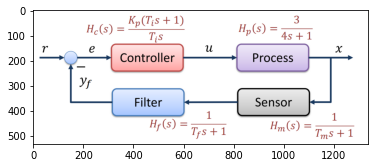

In [10]:
# Read Images
img = matplotlib.image.imread('Example.png')
 
# Output Images
plt.imshow(img)

In [11]:

# Transfer Function Process
K = 3; T = 4
num_p = np.array ([K])
den_p = np.array ([T , 1])
Hp = control.tf(num_p , den_p)
print ('Hp(s) =', Hp)
# Transfer Function PI Controller
Kp = 0.4
Ti = 2
num_c = np.array ([Kp*Ti, Kp])
den_c = np.array ([Ti , 0])
Hc = control.tf(num_c, den_c)
print ('Hc(s) =', Hc)
# Transfer Function Measurement
Tm = 1
num_m = np.array ([1])
den_m = np.array ([Tm , 1])
Hm = control.tf(num_m , den_m)
print ('Hm(s) =', Hm)
# Transfer Function Lowpass Filter
Tf = 1
num_f = np.array ([1])
den_f = np.array ([Tf , 1])
Hf = control.tf(num_f , den_f)
print ('Hf(s) =', Hf)
# The Loop Transfer function
L = control.series(Hc, Hp, Hf, Hm)
print ('L(s) =', L)

Hp(s) = 
   3
-------
4 s + 1

Hc(s) = 
0.8 s + 0.4
-----------
    2 s

Hm(s) = 
  1
-----
s + 1

Hf(s) = 
  1
-----
s + 1

L(s) = 
         2.4 s + 1.2
-----------------------------
8 s^4 + 18 s^3 + 12 s^2 + 2 s



T(s) = 
             2.4 s + 1.2
-------------------------------------
8 s^4 + 18 s^3 + 12 s^2 + 4.4 s + 1.2

poles =  [-1.40867554+0.j         -0.61123728+0.j         -0.11504359+0.40121555j
 -0.11504359-0.40121555j]
wc = 0.37 rad/s
w180 = 0.77 rad/s
GM = 3.57
GM = 11.06 dB
PM = 30.09 deg
Kc = 1.43


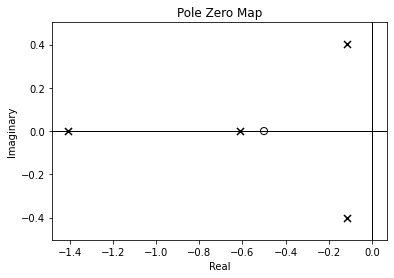

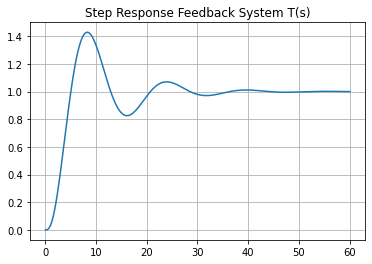

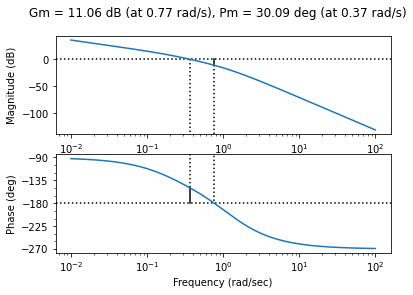

In [12]:
# Tracking transfer function
T = control.feedback(L,1)
print ('T(s) =', T)
control.pzmap(T)

# Step Response Feedback System (Tracking System)
t, y = control.step_response(T)
plt.figure(2)
plt.plot(t,y)
plt.title("Step Response Feedback System T(s)")
plt.grid()
# Bode Diagram with Stability Margins
plt.figure(3)
control.bode(L, dB=True, deg=True, margins=True) 
# Poles and Zeros
p = control.pole(T)
z = control.zero(T)
print("poles = ", p)
# Calculating stability margins and crossover frequencies
gm , pm , w180 , wc = control.margin(L)
# Convert gm to Decibel
gmdb = 20 * np.log10(gm)
print("wc =", f'{wc:.2f}', "rad/s")
print("w180 =", f'{w180:.2f}', "rad/s")
print("GM =", f'{gm:.2f}')
print("GM =", f'{gmdb:.2f}', "dB")
print("PM =", f'{pm:.2f}', "deg")
# Find when Sysem is Marginally Stable (Kritical Gain - Kc)
Kc = Kp*gm
print("Kc =", f'{Kc:.2f}')
